# Recommendation system

ML: Generate 25 movie recommendations for a user with metrics. You can use any framework or dataset that you prefer. Submit the entire solution in a jupyter notebook and the details of the dataset use.  

Kaggle has many usable datasets or you can use the following dataset : https://grouplens.org/datasets/movielens/100k/ 


Data set details :

 https://grouplens.org/datasets/movielens/100k/

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.

This data set consists of:

* 100,000 ratings (1-5) from 943 users on 1682 movies.
* Each user has rated at least 20 movies.
* Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th,
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set. The data set may be used for any research
purposes under the following conditions:

 * The user may not state or imply any endorsement from the
   University of Minnesota or the GroupLens Research Group.

 * The user must acknowledge the use of the data set in
   publications resulting from the use of the data set
   (see below for citation information).

 * The user may not redistribute the data without separate
   permission.

 * The user may not use this information for any commercial or
   revenue-bearing purposes without first obtaining permission
   from a faculty member of the GroupLens Research Project at the
   University of Minnesota.

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os


# EDA

# Preprocessing

In [2]:
header = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(r'C://Users//user//Downloads//ml-100k//u.data', sep='\t', names=header)


In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')


In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [6]:
# we are arranging the ratings according to time ascending order
print('Sorting the dataframe by date..')
df.sort_values(by='timestamp', inplace=True)
print('Done..')

Sorting the dataframe by date..
Done..


In [7]:
df.head()

,user_id,item_id,rating,timestamp
214,259,255,4,1997-09-20 03:05:10
83965,259,286,4,1997-09-20 03:05:27
43027,259,298,4,1997-09-20 03:05:54
21396,259,185,4,1997-09-20 03:06:21
82655,259,173,4,1997-09-20 03:07:23


In [8]:
df.describe()['rating']

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

# Checking for Nan values

In [9]:
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  0


In [10]:
dup_bool = df.duplicated(['user_id','item_id','rating'])
dups = sum(dup_bool) 
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


# Basic statistics

In [11]:
print("\n Total no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.user_id)))
print("Total No of movies  :", len(np.unique(df.item_id)))


 Total no of ratings : 100000
Total No of Users   : 943
Total No of movies  : 1682


# Splitting into train & Test set

In [12]:
# Creating train & test data sets & saving 

if not os.path.isfile('movielens_train.csv'):
    df.iloc[:int(df.shape[0]*0.80)].to_csv("movielense_train.csv", index=False)

if not os.path.isfile('movielense_test.csv'):
    df.iloc[int(df.shape[0]*0.80):].to_csv("movielense_test.csv", index=False)

train_df = pd.read_csv("movielense_train.csv", parse_dates=['timestamp'])
test_df = pd.read_csv("movielense_test.csv")

# statistics of train data set

In [13]:
print("\nTotal no of ratings :",train_df.shape[0])
print("Total No of Users   :", len(np.unique(train_df.user_id)))
print("Total No of movies  :", len(np.unique(train_df.item_id)))


Total no of ratings : 80000
Total No of Users   : 751
Total No of movies  : 1616


# statistics of test data set

In [14]:
print("\nTotal no of ratings :",test_df.shape[0])
print("Total No of Users   :", len(np.unique(test_df.user_id)))
print("Total No of movies  :", len(np.unique(test_df.item_id)))


Total no of ratings : 20000
Total No of Users   : 301
Total No of movies  : 1448


# EDA on Train data set

# Ratings distribution in Train set

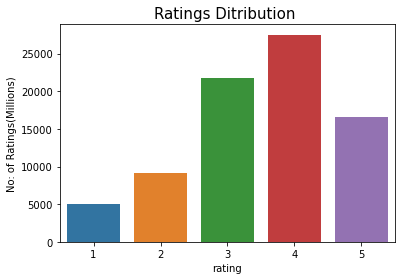

In [15]:
fig, ax = plt.subplots()
plt.title('Ratings Ditribution ', fontsize=15)
sns.countplot(train_df.rating)
ax.set_ylabel('No: of Ratings(Millions)')

plt.show()

# Add new column week day to train data set

In [16]:
train_df['day_of_week'] = train_df.timestamp.dt.day_name()

train_df.head()

,user_id,item_id,rating,timestamp,day_of_week
0,259,255,4,1997-09-20 03:05:10,Saturday
1,259,286,4,1997-09-20 03:05:27,Saturday
2,259,298,4,1997-09-20 03:05:54,Saturday
3,259,185,4,1997-09-20 03:06:21,Saturday
4,259,173,4,1997-09-20 03:07:23,Saturday


In [17]:
train_df['timestamp']=train_df['timestamp'].dt.normalize()

In [18]:
train_df.head()

,user_id,item_id,rating,timestamp,day_of_week
0,259,255,4,1997-09-20,Saturday
1,259,286,4,1997-09-20,Saturday
2,259,298,4,1997-09-20,Saturday
3,259,185,4,1997-09-20,Saturday
4,259,173,4,1997-09-20,Saturday


# number of ratings per month

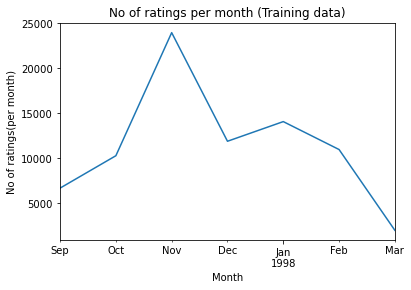

In [19]:
ax = train_df.resample('m', on='timestamp')['rating'].count().plot()
ax.set_title('No of ratings per month (Training data)')
plt.xlabel('Month')
plt.ylabel('No of ratings(per month)')
plt.show()

Inference: There is more ratings on Nov, Dec months

# Analysis on ratings given by user

In [20]:
rated_movies_per_user = train_df.groupby(by='user_id')['rating'].count().sort_values(ascending=False)

rated_movies_per_user.head()

user_id
405    737
13     608
655    601
450    531
276    504
Name: rating, dtype: int64

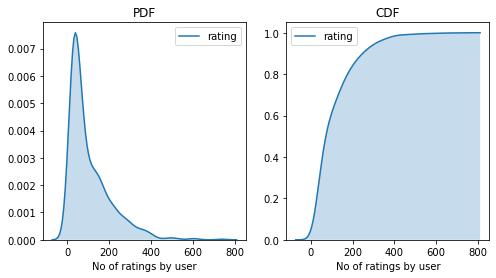

In [21]:
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

In [22]:
rated_movies_per_user.describe()

count    751.000000
mean     106.524634
std       99.830104
min        1.000000
25%       34.000000
50%       66.000000
75%      150.000000
max      737.000000
Name: rating, dtype: float64

In [23]:
quantiles = rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

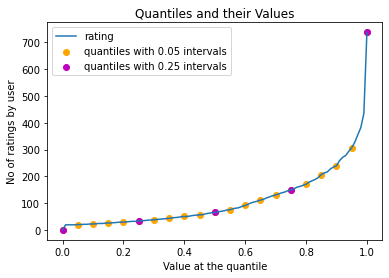

In [24]:
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')


plt.show()

In [25]:
quantiles[::5]

0.00      1
0.05     21
0.10     23
0.15     27
0.20     30
0.25     34
0.30     39
0.35     44
0.40     51
0.45     57
0.50     66
0.55     76
0.60     92
0.65    112
0.70    131
0.75    150
0.80    171
0.85    207
0.90    240
0.95    307
1.00    737
Name: rating, dtype: int64

In [26]:
print('\n No of ratings at last 5 percentile : {}\n'.format(sum(rated_movies_per_user>= 307)) )


 No of ratings at last 5 percentile : 38



# Analysis on ratings of a movie given by a user 

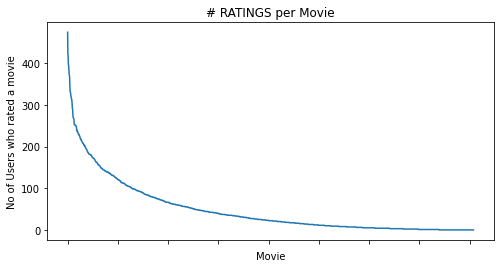

In [27]:
ratings_per_movie = train_df.groupby(by='item_id')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(ratings_per_movie.values)
plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of Users who rated a movie')
ax.set_xticklabels([])

plt.show()

inference : it is skewed , there are movies which got less than 100 ratings , there are few movies which got over 100 ratings

# Number of ratings on each day of the week

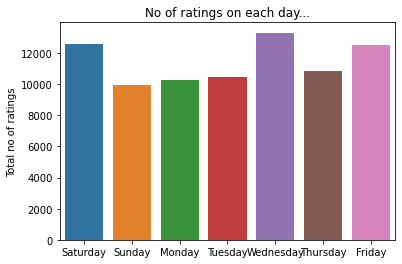

In [28]:
fig, ax = plt.subplots()
sns.countplot(x='day_of_week', data=train_df, ax=ax)
plt.title('No of ratings on each day...')
plt.ylabel('Total no of ratings')
plt.xlabel('')
plt.show()

inference: Almost on all days there is ratings nearly 10000 or greater than 10000

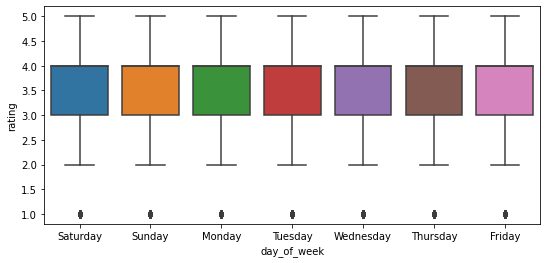

0:00:01.168643


In [29]:
start = datetime.now()
fig = plt.figure(figsize=plt.figaspect(.45))
sns.boxplot(y='rating', x='day_of_week', data=train_df)
plt.show()
print(datetime.now() - start)

In [30]:
avg_week_df = train_df.groupby(by=['day_of_week'])['rating'].mean()
print(" Average ratings")
print(avg_week_df)


 Average ratings
day_of_week
Friday       3.432935
Monday       3.525129
Saturday     3.519758
Sunday       3.538987
Thursday     3.567911
Tuesday      3.538872
Wednesday    3.516071
Name: rating, dtype: float64


# Sparse matrix creation

In [37]:
import seaborn as sns
sns.set_style('whitegrid')
import os
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import random

In [38]:
start = datetime.now()
if os.path.isfile('sparse_train_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    train_sparse_matrix = sparse.load_npz('sparse_train_matrix.npz')
    print("Done..")
else: 
    print("creating sparse_matrix from the dataframe..")
    sparse_train_matrix = sparse.csr_matrix((train_df.rating.values, (train_df.user_id.values,
                                               train_df.item_id.values)),)
    
    print('Done. It\'s shape is : (user, movie) : ',sparse_train_matrix.shape)
    print('Saving it into disk for furthur usage..')
    sparse.save_npz("sparse_train_matrix.npz", sparse_train_matrix)
    print('Done..\n')

print(datetime.now() - start)

creating sparse_matrix from the dataframe..
Done. It's shape is : (user, movie) :  (944, 1683)
Saving it into disk for furthur usage..
Done..

0:00:00.591169


In [39]:
a,b = sparse_train_matrix.shape
elem = sparse_train_matrix.count_nonzero()

print("Sparsity Of Train matrix : {} % ".format(  (1-(elem/(a*b))) * 100) )

Sparsity Of Train matrix : 94.96460114605678 % 


# creating sparse matrix from test data frame

In [42]:
start = datetime.now()
if os.path.isfile('sparse_test_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    test_sparse_matrix = sparse.load_npz('sparse_train_matrix.npz')
    print("Done..")
else: 
    print("creating sparse_matrix from the dataframe..")
    sparse_test_matrix = sparse.csr_matrix((test_df.rating.values, (test_df.user_id.values,
                                               test_df.item_id.values)),)
    
    print('Done. It\'s shape is : (user, movie) : ',sparse_test_matrix.shape)
    print('Saving it into disk for furthur usage..')
    sparse.save_npz("sparse_test_matrix.npz", sparse_test_matrix)
    print('Done..\n')

print(datetime.now() - start)

creating sparse_matrix from the dataframe..
Done. It's shape is : (user, movie) :  (943, 1681)
Saving it into disk for furthur usage..
Done..

0:00:00.156258


In [43]:
x,y = sparse_test_matrix.shape
elem = sparse_test_matrix.count_nonzero()

print("Sparsity Of Test matrix : {} % ".format(  (1-(elem/(x*y))) * 100) )

Sparsity Of Test matrix : 98.73831601777208 % 


# Global average of all movie ratings,Average rating per user,Average rating per movie

In [44]:


def get_avg_ratings(sparse_matrix, of_users):
     
    ax = 1 if of_users else 0 
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    is_rated = sparse_matrix!=0
    no_of_ratings = is_rated.sum(axis=ax).A1
    u,m = sparse_matrix.shape
    avg_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
                                 for i in range(u if of_users else m) 
                                    if no_of_ratings[i] !=0}

  
    return avg_ratings

# Average of all movie ratings

In [45]:
train_ave = dict()
train_global_ave = sparse_train_matrix.sum()/sparse_train_matrix.count_nonzero()
train_ave['global'] = train_global_ave
train_ave

{'global': 3.51765}

# Average ratings per user

In [46]:
train_ave['user'] = get_avg_ratings(sparse_train_matrix, of_users=True)
print('\nAverage rating of user 10 :',train_ave['user'][10])


Average rating of user 10 : 4.206521739130435


# Average ratings per movie

In [47]:
train_ave['movie'] =  get_avg_ratings(sparse_train_matrix, of_users=False)
print('\n AVerage rating of movie 15 :',train_ave['movie'][15])


 AVerage rating of movie 15 : 3.7936507936507935


# PDF & CDF of avg ratings of users & Movies train data

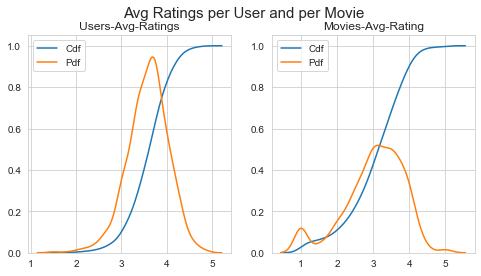

0:00:04.017831


In [48]:
start = datetime.now()

# draw pdfs for average rating per user and average
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))
fig.suptitle('Avg Ratings per User and per Movie', fontsize=15)

ax1.set_title('Users-Avg-Ratings')

# get the list of average user ratings from the averages dictionary..
usr_avgs = [rat for rat in train_ave['user'].values()]
sns.distplot(usr_avgs, ax=ax1, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(usr_avgs, ax=ax1, hist=False,label='Pdf')

ax2.set_title('Movies-Avg-Rating')

# get the list of movie_average_ratings from the dictionary..
movie_avgs = [rat for rat in train_ave['movie'].values()]
sns.distplot(movie_avgs, ax=ax2, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(movie_avgs, ax=ax2, hist=False, label='Pdf')

plt.show()
print(datetime.now() - start)

# cold start with users

In [49]:
total_users = len(np.unique(df.user_id))
users_train = len(train_ave['user'])
new_users = total_users - users_train

print('\nTotal number of Users  :', total_users)
print('\nNumber of Users in Train data :', users_train)
print("\nNo of Users that didn't appear in train data: {}({} %) \n ".format(new_users,
                                                                        np.round((new_users/total_users)*100, 2)))


Total number of Users  : 943

Number of Users in Train data : 751

No of Users that didn't appear in train data: 192(20.36 %) 
 


inference: We will have to handle 192 new users who is not in train data

# cold strat with movies

In [50]:
total_movies = len(np.unique(df.item_id))
movies_train = len(train_ave['movie'])
new_movies = total_movies - movies_train

print('\nTotal number of Movies  :', total_movies)
print('\nNumber of Users in Train data :', movies_train)
print("\nNo of Movies that didn't appear in train data: {}({} %) \n ".format(new_movies,
                                                                        np.round((new_movies/total_movies)*100, 2)))


Total number of Movies  : 1682

Number of Users in Train data : 1616

No of Movies that didn't appear in train data: 66(3.92 %) 
 


# Computing Similarity matrices 

# user-user similarity matrices

In [51]:
from sklearn.metrics.pairwise import cosine_similarity


def compute_user_similarity(sparse_matrix, compute_for_few=False, top = 100, verbose=False, verb_for_n_rows = 20,
                            draw_time_taken=True):
    no_of_users, _ = sparse_matrix.shape
    # get the indices of  non zero rows(users) from our sparse matrix
    row_ind, col_ind = sparse_matrix.nonzero()
    row_ind = sorted(set(row_ind)) # we don't have to
    time_taken = list() #  time taken for finding similar users for an user..
    
    # we create rows, cols, and data lists.., which can be used to create sparse matrices
    rows, cols, data = list(), list(), list()
    if verbose: print("Computing top",top,"similarities for each user..")
    
    start = datetime.now()
    temp = 0
    
    for row in row_ind[:top] if compute_for_few else row_ind:
        temp = temp+1
        prev = datetime.now()
        
        # get the similarity row for this user with all other users
        sim = cosine_similarity(sparse_matrix.getrow(row), sparse_matrix).ravel()
        # We will get only the top ''top'' most similar users and ignore rest of them..
        top_sim_ind = sim.argsort()[-top:]
        top_sim_val = sim[top_sim_ind]
        
        # add them to our rows, cols and data
        rows.extend([row]*top)
        cols.extend(top_sim_ind)
        data.extend(top_sim_val)
        time_taken.append(datetime.now().timestamp() - prev.timestamp())
        if verbose:
            if temp%verb_for_n_rows == 0:
                print("computing done for {} users [  time elapsed : {}  ]"
                      .format(temp, datetime.now()-start))
            
        
    # lets create sparse matrix out of these and return it
    if verbose: print('Creating Sparse matrix from the computed similarities')
    #return rows, cols, data
    
    if draw_time_taken:
        plt.plot(time_taken, label = 'time taken for each user')
        plt.plot(np.cumsum(time_taken), label='Total time')
        plt.legend(loc='best')
        plt.xlabel('User')
        plt.ylabel('Time (seconds)')
        plt.show()
        
    return sparse.csr_matrix((data, (rows, cols)), shape=(no_of_users, no_of_users)), time_taken 

Computing top 100 similarities for each user..
computing done for 20 users [  time elapsed : 0:00:00.453758  ]
computing done for 40 users [  time elapsed : 0:00:00.679565  ]
computing done for 60 users [  time elapsed : 0:00:00.929591  ]
computing done for 80 users [  time elapsed : 0:00:01.179601  ]
computing done for 100 users [  time elapsed : 0:00:01.476483  ]
Creating Sparse matrix from the computed similarities


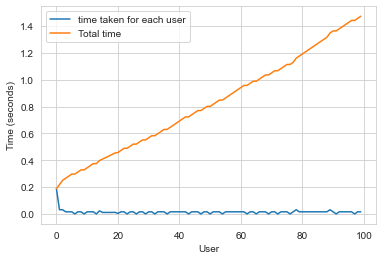

----------------------------------------------------------------------------------------------------
Time taken : 0:00:02.768596


In [52]:
start = datetime.now()
u_u_sim_sparse, _ = compute_user_similarity(sparse_train_matrix, compute_for_few=True, top = 100,
                                                     verbose=True)
print("-"*100)
print("Time taken :",datetime.now()-start)

# Truncated SVD for dimensionality reduction of user vector

In [53]:
from datetime import datetime
from sklearn.decomposition import TruncatedSVD

start = datetime.now()


movielens_svd = TruncatedSVD(n_components=500, algorithm='randomized', random_state=15)
trunc_svd = movielens_svd.fit_transform(sparse_train_matrix)

print(datetime.now()-start)

0:00:06.177849


In [54]:
expl_var = np.cumsum(movielens_svd.explained_variance_ratio_)

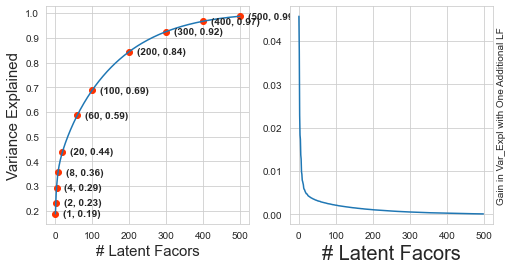

In [55]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))

ax1.set_ylabel("Variance Explained", fontsize=15)
ax1.set_xlabel("# Latent Facors", fontsize=15)
ax1.plot(expl_var)
# annote some (latentfactors, expl_var) to make it clear
ind = [1, 2,4,8,20, 60, 100, 200, 300, 400, 500]
ax1.scatter(x = [i-1 for i in ind], y = expl_var[[i-1 for i in ind]], c='#ff3300')
for i in ind:
    ax1.annotate(s ="({}, {})".format(i,  np.round(expl_var[i-1], 2)), xy=(i-1, expl_var[i-1]),
                xytext = ( i+20, expl_var[i-1] - 0.01), fontweight='bold')

change_in_expl_var = [expl_var[i+1] - expl_var[i] for i in range(len(expl_var)-1)]
ax2.plot(change_in_expl_var)



ax2.set_ylabel("Gain in Var_Expl with One Additional LF", fontsize=10)
ax2.yaxis.set_label_position("right")
ax2.set_xlabel("# Latent Facors", fontsize=20)

plt.show()

In [56]:
for i in ind:
    print("({}, {})".format(i, np.round(expl_var[i-1], 2)))

(1, 0.19)
(2, 0.23)
(4, 0.29)
(8, 0.36)
(20, 0.44)
(60, 0.59)
(100, 0.69)
(200, 0.84)
(300, 0.92)
(400, 0.97)
(500, 0.99)


Inference:

In [57]:
# Let's project our Original U_M matrix into into 500 Dimensional space...
start = datetime.now()
trunc_matrix = train_sparse_matrix.dot(movielens_svd.components_.T)
print(datetime.now()- start)

0:00:00.093755


In [58]:
type(trunc_matrix), trunc_matrix.shape

(numpy.ndarray, (944, 500))

In [59]:
if not os.path.isfile('trunc_sparse_matrix.npz'):
    # create that sparse sparse matrix
    trunc_sparse_matrix = sparse.csr_matrix(trunc_matrix)
    # Save this truncated sparse matrix for later usage..
    sparse.save_npz('trunc_sparse_matrix', trunc_sparse_matrix)
else:
    trunc_sparse_matrix = sparse.load_npz('trunc_sparse_matrix.npz')

In [60]:
trunc_sparse_matrix.shape

(944, 500)

Computing top 50 similarities for each user..
computing done for 10 users [  time elapsed : 0:00:00.530542  ]
computing done for 20 users [  time elapsed : 0:00:01.077443  ]
computing done for 30 users [  time elapsed : 0:00:01.718112  ]
computing done for 40 users [  time elapsed : 0:00:02.358757  ]
computing done for 50 users [  time elapsed : 0:00:02.983788  ]
Creating Sparse matrix from the computed similarities


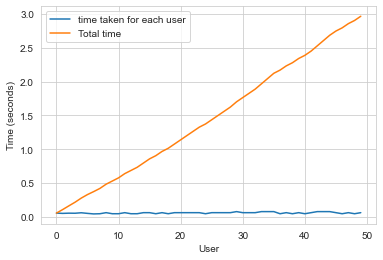

--------------------------------------------------
time: 0:00:04.703818


In [61]:
start = datetime.now()
trunc_u_u_sim_matrix, _ = compute_user_similarity(trunc_sparse_matrix, compute_for_few=True, top=50, verbose=True, 
                                                 verb_for_n_rows=10)
print("-"*50)
print("time:",datetime.now()-start)

# Movie-Movie Similarity matrix

In [62]:
start = datetime.now()
if not os.path.isfile('m_m_sim_sparse.npz'):
    print("It seems you don't have that file. Computing movie_movie similarity...")
    start = datetime.now()
    m_m_sim_sparse = cosine_similarity(X=train_sparse_matrix.T, dense_output=False)
    print("Done..")
    # store this sparse matrix in disk before using it. For future purposes.
    print("Saving it to disk without the need of re-computing it again.. ")
    sparse.save_npz("m_m_sim_sparse.npz", m_m_sim_sparse)
    print("Done..")
else:
    print("It is there, We will get it.")
    m_m_sim_sparse = sparse.load_npz("m_m_sim_sparse.npz")
    print("Done ...")

print("It's a ",m_m_sim_sparse.shape," dimensional matrix")

print(datetime.now() - start)

It is there, We will get it.
Done ...
It's a  (1683, 1683)  dimensional matrix
0:00:00.817774


In [63]:
m_m_sim_sparse.shape

(1683, 1683)

inference:
    Only top similar movies considered
    storing the top similar items into separate dictionary

In [64]:

movie_ids = np.unique(m_m_sim_sparse.nonzero()[1])

In [65]:
start = datetime.now()
similar_movies = dict()
for movie in movie_ids:
    # get the top similar movies and store them in the dictionary
    sim_movies = m_m_sim_sparse[movie].toarray().ravel().argsort()[::-1][1:]
    similar_movies[movie] = sim_movies[:100]
print(datetime.now() - start)

# just testing similar movies for movie_25
similar_movies[25]

0:00:01.363000


array([ 121,  237,    1,  100,  405,  151,  117,   15,    7,  111,   50,
        742,  125,  181,  257,  118,  222,  282,  284,  274,  546,  628,
        204,  275,  471, 1047,  210,   98,   88,  235,  216,  591,   69,
        276,  174,   79,  476,  393,   13,  173,   70,  845,  202,  127,
        423, 1028,   97,  411,  196,  147,  168,  258,  685,    4,  597,
        294,   28,  568,  238,   95,  756,   82,    9,  475,   11,   56,
        288,  172,  153,  208,  655,  186,  508,  473,  318,   12,  273,
        692,  472,  866,  291,  732,  735,  191,   58,  132,   64,  195,
        176,  211,   71,  385,  144,  143,   96,  161,  410,  248,    8,
        255], dtype=int64)

# most similar movies using similarity matrix

In [66]:
items = pd.read_csv(r'C://Users//user//Downloads//ml-100k//u.item', header = None , sep = "|" , encoding='latin-1')
items.columns = ['movie id' , 'movie title' , 'release date' , 'video release date' ,
              'IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Childrens' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film_Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci_Fi' ,
              'Thriller' , 'War' , 'Western']

In [67]:
items.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [68]:
movie_titles=items[['movie id', 'movie title' , 'release date']]

In [69]:
movie_titles.head()

,movie id,movie title,release date
0,1,Toy Story (1995),01-Jan-1995
1,2,GoldenEye (1995),01-Jan-1995
2,3,Four Rooms (1995),01-Jan-1995
3,4,Get Shorty (1995),01-Jan-1995
4,5,Copycat (1995),01-Jan-1995


In [70]:
movie_titles['year_of_release'] = pd.DatetimeIndex(movie_titles['release date']).year

<ipython-input-70-525a3d4ba3b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_titles['year_of_release'] = pd.DatetimeIndex(movie_titles['release date']).year


In [71]:
movie_titles

,movie id,movie title,release date,year_of_release
0,1,Toy Story (1995),01-Jan-1995,1995.0
1,2,GoldenEye (1995),01-Jan-1995,1995.0
2,3,Four Rooms (1995),01-Jan-1995,1995.0
3,4,Get Shorty (1995),01-Jan-1995,1995.0
4,5,Copycat (1995),01-Jan-1995,1995.0
...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,1998.0
1678,1679,B. Monkey (1998),06-Feb-1998,1998.0
1679,1680,Sliding Doors (1998),01-Jan-1998,1998.0
1680,1681,You So Crazy (1994),01-Jan-1994,1994.0


In [72]:
movie_df=movie_titles[['movie id','movie title','year_of_release']]

In [73]:
movie_df.set_index('movie id')

,movie title,year_of_release
movie id,,
1,Toy Story (1995),1995.0
2,GoldenEye (1995),1995.0
3,Four Rooms (1995),1995.0
4,Get Shorty (1995),1995.0
5,Copycat (1995),1995.0
...,...,...
1678,Mat' i syn (1997),1998.0
1679,B. Monkey (1998),1998.0
1680,Sliding Doors (1998),1998.0


# similar movies for Movie -----> Billy Madison (1995)

In [74]:
mv_id = 40

print("\nMovie ----->",movie_df.loc[mv_id].values[1])

print("\nIt has {} Ratings from users.".format(train_sparse_matrix[:,mv_id].getnnz()))

print("\nWe have {} movies which are similarto this  and we will get only top most..".format(m_m_sim_sparse[:,mv_id].getnnz()))


Movie -----> Billy Madison (1995)

It has 46 Ratings from users.

We have 1388 movies which are similarto this  and we will get only top most..


In [75]:
similarities = m_m_sim_sparse[mv_id].toarray().ravel()

similar_indices = similarities.argsort()[::-1][1:]

similarities[similar_indices]

sim_indices = similarities.argsort()[::-1][1:] # It will sort and reverse the array and ignore its similarity (ie.,1)
                                               # and return its indices(movie_ids)

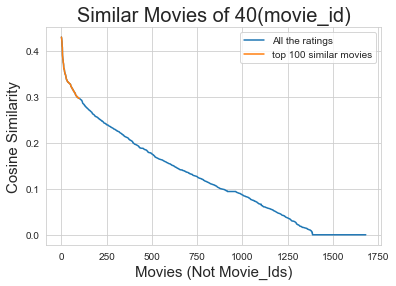

In [76]:
plt.plot(similarities[sim_indices], label='All the ratings')
plt.plot(similarities[sim_indices[:100]], label='top 100 similar movies')
plt.title("Similar Movies of {}(movie_id)".format(mv_id), fontsize=20)
plt.xlabel("Movies (Not Movie_Ids)", fontsize=15)
plt.ylabel("Cosine Similarity",fontsize=15)
plt.legend()
plt.show()

# top 25 similar movies

In [77]:
movie_titles.loc[sim_indices[:25]]

,movie id,movie title,release date,year_of_release
728,729,Nell (1994),01-Jan-1994,1994.0
63,64,"Shawshank Redemption, The (1994)",01-Jan-1994,1994.0
167,168,Monty Python and the Holy Grail (1974),01-Jan-1974,1974.0
401,402,Ghost (1990),01-Jan-1990,1990.0
396,397,Striking Distance (1993),01-Jan-1993,1993.0
386,387,"Age of Innocence, The (1993)",01-Jan-1993,1993.0
393,394,Radioland Murders (1994),01-Jan-1994,1994.0
385,386,Addams Family Values (1993),01-Jan-1993,1993.0
72,73,Maverick (1994),01-Jan-1994,1994.0
384,385,True Lies (1994),01-Jan-1994,1994.0


# Machine learning models

In [78]:
def get_sample_sparse_matrix(sparse_matrix, no_users, no_movies, path, verbose = True):
    """
        It will get it from the ''path'' if it is present  or It will create 
        and store the sampled sparse matrix in the path specified.
    """

    # get (row, col) and (rating) tuple from sparse_matrix...
    row_ind, col_ind, ratings = sparse.find(sparse_matrix)
    users = np.unique(row_ind)
    movies = np.unique(col_ind)

    print("Original Matrix : (users, movies) -- ({} {})".format(len(users), len(movies)))
    print("Original Matrix : Ratings -- {}\n".format(len(ratings)))

    # It just to make sure to get same sample everytime we run this program..
    # and pick without replacement....
    np.random.seed(15)
    sample_users = np.random.choice(users, no_users, replace=False)
    sample_movies = np.random.choice(movies, no_movies, replace=False)
    # get the boolean mask or these sampled_items in originl row/col_inds..
    mask = np.logical_and( np.isin(row_ind, sample_users),
                      np.isin(col_ind, sample_movies) )
    
    sample_sparse_matrix = sparse.csr_matrix((ratings[mask], (row_ind[mask], col_ind[mask])),
                                             shape=(max(sample_users)+1, max(sample_movies)+1))

    if verbose:
        print("Sampled Matrix : (users, movies) -- ({} {})".format(len(sample_users), len(sample_movies)))
        print("Sampled Matrix : Ratings --", format(ratings[mask].shape[0]))

    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz(path, sample_sparse_matrix)
    if verbose:
            print('Done..\n')
    
    return sample_sparse_matrix

# sampling data

In [79]:
start = datetime.now()
path = "sample_train_sparse_matrix.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_train_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else: 
    # get 10k users and 1k movies from available data 
    sample_train_sparse_matrix = get_sample_sparse_matrix(sparse_train_matrix, no_users=100, no_movies=800,
                                             path = path)

print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.140633


In [80]:
start = datetime.now()

path = "sample_test_sparse_matrix.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_test_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else:
    # get 5k users and 500 movies from available data 
    sample_test_sparse_matrix = get_sample_sparse_matrix(sparse_test_matrix, no_users=130, no_movies=330,
                                                 path = "sample_test_sparse_matrix.npz")
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.109382


# Finding Global Average of all movie ratings, Average rating per User, and Average rating per Movie (from sampled train)

In [81]:
sample_train_averages = dict()

# Global Average of all movie ratings

In [82]:
# get the global average of ratings in our train set.
global_average = sample_train_sparse_matrix.sum()/sample_train_sparse_matrix.count_nonzero()
sample_train_averages['global'] = global_average
sample_train_averages

{'global': 3.3791991856124874}

# Finding Average rating per User

In [83]:
sample_train_averages['user'] = get_avg_ratings(sample_train_sparse_matrix, of_users=True)
print('\nAverage rating of user 151 :',sample_train_averages['user'][151])


Average rating of user 151 : 4.034722222222222


# Finding Average rating per Movie

In [84]:
sample_train_averages['movie'] =  get_avg_ratings(sample_train_sparse_matrix, of_users=False)
print('\n AVerage rating of movie 151 :',sample_train_averages['movie'][151])


 AVerage rating of movie 151 : 3.6341463414634148


# Featurizing data

In [85]:
print('\n No of ratings in Our Sampled train matrix is : {}\n'.format(sample_train_sparse_matrix.count_nonzero()))
print('\n No of ratings in Our Sampled test  matrix is : {}\n'.format(sample_test_sparse_matrix.count_nonzero()))


 No of ratings in Our Sampled train matrix is : 5894


 No of ratings in Our Sampled test  matrix is : 2180



# Featurizing data for Regression problem

# Featurizing train data

In [93]:
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(sample_train_sparse_matrix)

In [94]:
start = datetime.now()
if os.path.isfile('reg_train.csv'):
    print("File already exists you don't have to prepare again..." )
else:
    print('preparing {} tuples for the dataset..\n'.format(len(sample_train_ratings)))
    with open('reg_train.csv', mode='w') as reg_data_file:
        count = 0
        for (user, movie, rating)  in zip(sample_train_users, sample_train_movies, sample_train_ratings):
            st = datetime.now()
        #     print(user, movie)    
            #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            # compute the similar Users of the "user"        
            user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar users for this movie
            top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
            # we will make it's length "5" by adding movie averages to .
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
        #     print(top_sim_users_ratings, end=" ")    


            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            # compute the similar movies of the "movie"        
            movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar movie rated by this user..
            top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
            # we will make it's length "5" by adding user averages to.
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
        #     print(top_sim_movies_ratings, end=" : -- ")

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            row.append(user)
            row.append(movie)
            # Now add the other features to this data...
            row.append(sample_train_averages['global']) # first feature
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            # Avg_user rating
            row.append(sample_train_averages['user'][user])
            # Avg_movie rating
            row.append(sample_train_averages['movie'][movie])

            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%10000 == 0:
                # print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))


print(datetime.now() - start)

File already exists you don't have to prepare again...
0:00:00


# Creating train dataframe from reg_train

In [95]:
reg_train = pd.read_csv('reg_train.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'], header=None)
reg_train.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,17,1,3.379199,5.0,4.0,4.0,4.0,3.0,4,1,1.0,3.0,3.0,2.750000,3.8125,4
1,54,1,3.379199,5.0,5.0,4.0,5.0,3.0,4,5,4.0,2.0,4.0,3.482759,3.8125,4
2,66,1,3.379199,5.0,5.0,3.0,4.0,4.0,3,5,3.0,3.0,3.0,3.352941,3.8125,3
3,70,1,3.379199,4.0,5.0,3.0,3.0,5.0,3,4,3.0,5.0,4.0,3.484848,3.8125,4
4,75,1,3.379199,4.0,4.0,3.0,4.0,4.0,4,3,5.0,3.0,5.0,3.200000,3.8125,4



    GAvg : Average rating of all the ratings

    Similar users rating of this movie:
        sur1, sur2, sur3, sur4, sur5 ( top 5 similar users who rated that movie.. )

    Similar movies rated by this user:
        smr1, smr2, smr3, smr4, smr5 ( top 5 similar movies rated by this movie.. )

    UAvg : User's Average rating

    MAvg : Average rating of this movie

    rating : Rating of this movie by this user.


# Featurizing test data

In [96]:
# get users, movies and ratings from the Sampled Test 
sample_test_users, sample_test_movies, sample_test_ratings = sparse.find(sample_test_sparse_matrix)

In [97]:
sample_train_averages['global']

3.3791991856124874

In [98]:
start = datetime.now()

if os.path.isfile('reg_test.csv'):
    print("It is already created...")
else:

    print('preparing {} tuples for the dataset..\n'.format(len(sample_test_ratings)))
    with open('reg_test.csv', mode='w') as reg_data_file:
        count = 0 
        for (user, movie, rating)  in zip(sample_test_users, sample_test_movies, sample_test_ratings):
            st = datetime.now()

        #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            #print(user, movie)
            try:
                # compute the similar Users of the "user"        
                user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
                top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar users for this movie
                top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
                # we will make it's length "5" by adding movie averages to .
                top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
                # print(top_sim_users_ratings, end="--")

            except (IndexError, KeyError):
                # It is a new User or new Movie or there are no ratings for given user for top similar movies...
                ########## Cold STart Problem ##########
                top_sim_users_ratings.extend([sample_train_averages['global']]*(5 - len(top_sim_users_ratings)))
                #print(top_sim_users_ratings)
            except:
                print(user, movie)
                # we just want KeyErrors to be resolved. Not every Exception...
                raise



            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            try:
                # compute the similar movies of the "movie"        
                movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
                top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar movie rated by this user..
                top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
                # we will make it's length "5" by adding user averages to.
                top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
                #print(top_sim_movies_ratings)
            except (IndexError, KeyError):
                #print(top_sim_movies_ratings, end=" : -- ")
                top_sim_movies_ratings.extend([sample_train_averages['global']]*(5-len(top_sim_movies_ratings)))
                #print(top_sim_movies_ratings)
            except :
                raise

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            # add usser and movie name first
            row.append(user)
            row.append(movie)
            row.append(sample_train_averages['global']) # first feature
            #print(row)
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            #print(row)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            #print(row)
            # Avg_user rating
            try:
                row.append(sample_train_averages['user'][user])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            #print(row)
            # Avg_movie rating
            try:
                row.append(sample_train_averages['movie'][movie])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            #print(row)
            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            #print(row)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            #print(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%1000 == 0:
                #print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))
    print("",datetime.now() - start)  

It is already created...


# creating testdata frame from reg_test

In [99]:
reg_test_df = pd.read_csv('reg_test.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                          'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                          'UAvg', 'MAvg', 'rating'], header=None)
reg_test_df.head(5)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,64,2,3.379199,3.0,2.0,4.0,3.0,1.0,3.379199,3.379199,3.379199,3.379199,3.379199,3.379199,3.285714,3
1,197,2,3.379199,3.0,2.0,4.0,3.0,1.0,3.379199,3.379199,3.379199,3.379199,3.379199,3.379199,3.285714,3
2,280,2,3.379199,3.0,2.0,4.0,3.0,1.0,3.379199,3.379199,3.379199,3.379199,3.379199,3.379199,3.285714,3
3,325,2,3.379199,3.0,2.0,4.0,3.0,1.0,3.379199,3.379199,3.379199,3.379199,3.379199,3.379199,3.285714,1
4,363,2,3.379199,3.0,2.0,4.0,3.0,1.0,3.379199,3.379199,3.379199,3.379199,3.379199,3.379199,3.285714,4



    GAvg : Average rating of all the ratings

    Similar users rating of this movie:
        sur1, sur2, sur3, sur4, sur5 ( top 5 simiular users who rated that movie.. )

    Similar movies rated by this user:
        smr1, smr2, smr3, smr4, smr5 ( top 5 simiular movies rated by this movie.. )

    UAvg : User AVerage rating

    MAvg : Average rating of this movie

    rating : Rating of this movie by this user.


# Transforming data for Surprise models

In [100]:
from surprise import Reader, Dataset

# transforming train data

In [101]:
reader = Reader(rating_scale=(1,5))
train_data = Dataset.load_from_df(reg_train[['user', 'movie', 'rating']], reader)
trainset = train_data.build_full_trainset() 

# transforming test data

In [102]:
testset = list(zip(reg_test_df.user.values, reg_test_df.movie.values, reg_test_df.rating.values))
testset[:3]

[(64, 2, 3), (197, 2, 3), (280, 2, 3)]

# Applying machine learning models

In [103]:
models_evaluation_train = dict()
models_evaluation_test = dict()

models_evaluation_train, models_evaluation_test

({}, {})

# unity functions for regression models

In [104]:
# to get rmse and mape given actual and predicted ratings..
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape

###################################################################
###################################################################
def run_xgboost(algo,  x_train, y_train, x_test, y_test, verbose=True):
    """
    It will return train_results and test_results
    """
    
    # dictionaries for storing train and test results
    train_results = dict()
    test_results = dict()
    
    
    # fit the model
    print('Training the model..')
    start =datetime.now()
    algo.fit(x_train, y_train, eval_metric = 'rmse')
    print('Done. Time taken : {}\n'.format(datetime.now()-start))
    print('Done \n')

    # from the trained model, get the predictions....
    print('Evaluating the model with TRAIN data...')
    start =datetime.now()
    y_train_pred = algo.predict(x_train)
    # get the rmse and mape of train data...
    rmse_train, mape_train = get_error_metrics(y_train.values, y_train_pred)
    
    # store the results in train_results dictionary..
    train_results = {'rmse': rmse_train,
                    'mape' : mape_train,
                    'predictions' : y_train_pred}
    
    #######################################
    # get the test data predictions and compute rmse and mape
    print('Evaluating Test data')
    y_test_pred = algo.predict(x_test) 
    rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred=y_test_pred)
    # store them in our test results dictionary.
    test_results = {'rmse': rmse_test,
                    'mape' : mape_test,
                    'predictions':y_test_pred}
    if verbose:
        print('\nTEST DATA')
        print('-'*30)
        print('RMSE : ', rmse_test)
        print('MAPE : ', mape_test)
        
    # return these train and test results...
    return train_results, test_results

# Utility functions for Surprise models

In [105]:
# it is just to makesure that all of our algorithms should produce same results
# everytime they run...

my_seed = 15
random.seed(my_seed)
np.random.seed(my_seed)

##########################################################
# get  (actual_list , predicted_list) ratings given list 
# of predictions (prediction is a class in Surprise).    
##########################################################
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

################################################################
# get ''rmse'' and ''mape'' , given list of prediction objecs 
################################################################
def get_errors(predictions, print_them=False):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual)**2))
    mape = np.mean(np.abs(pred - actual)/actual)

    return rmse, mape*100

##################################################################################
# It will return predicted ratings, rmse and mape of both train and test data   #
##################################################################################
def run_surprise(algo, trainset, testset, verbose=True): 
    '''
        return train_dict, test_dict
    
        It returns two dictionaries, one for train and the other is for test
        Each of them have 3 key-value pairs, which specify ''rmse'', ''mape'', and ''predicted ratings''.
    '''
    start = datetime.now()
    # dictionaries that stores metrics for train and test..
    train = dict()
    test = dict()
    
    # train the algorithm with the trainset
    st = datetime.now()
    print('Training the model...')
    algo.fit(trainset)
    print('Done. time taken : {} \n'.format(datetime.now()-st))
    
    # ---------------- Evaluating train data--------------------#
    st = datetime.now()
    print('Evaluating the model with train data..')
    # get the train predictions (list of prediction class inside Surprise)
    train_preds = algo.test(trainset.build_testset())
    # get predicted ratings from the train predictions..
    train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    # get ''rmse'' and ''mape'' from the train predictions.
    train_rmse, train_mape = get_errors(train_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Train Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(train_rmse, train_mape))
    
    #store them in the train dictionary
    if verbose:
        print('adding train results in the dictionary..')
    train['rmse'] = train_rmse
    train['mape'] = train_mape
    train['predictions'] = train_pred_ratings
    
    #------------ Evaluating Test data---------------#
    st = datetime.now()
    print('\nEvaluating for test data...')
    # get the predictions( list of prediction classes) of test data
    test_preds = algo.test(testset)
    # get the predicted ratings from the list of predictions
    test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    # get error metrics from the predicted and actual ratings
    test_rmse, test_mape = get_errors(test_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Test Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(test_rmse, test_mape))
    # store them in test dictionary
    if verbose:
        print('storing the test results in test dictionary...')
    test['rmse'] = test_rmse
    test['mape'] = test_mape
    test['predictions'] = test_pred_ratings
    
    print('\n'+'-'*45)
    print('Total time taken to run this algorithm :', datetime.now() - start)
    
    # return two dictionaries train and test
    return train, test

# Suprise BaselineModel

In [106]:
from surprise import BaselineOnly 
from surprise.model_selection import GridSearchCV
import surprise

In [107]:
start = datetime.now()


param_grid = {'bsl_options': {'method': ['als']},
              'k': [5,20, 30,40,50,60],
              'sim_options': {'name': ['pearson_baseline'],
                              'min_support': [2,3,4],
                              'shrinkage':[80,100],
                              'user_based': [True]}
              }


gs = GridSearchCV (surprise.KNNBaseline, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

gs.fit(train_data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

print("Time taken = ", datetime.now()- start)

1.0638274682333873
{'bsl_options': {'method': 'als'}, 'k': 30, 'sim_options': {'name': 'pearson_baseline', 'min_support': 3, 'shrinkage': 80, 'user_based': True}}
Time taken =  0:00:13.348720


In [108]:
# options are to specify.., how to compute those user and item biases
bsl_options = {'method': 'als',
               'learning_rate': .001,
               'reg':1
               }
bsl_algo = BaselineOnly(bsl_options=bsl_options)
# run this algorithm.., It will return the train and test results..
bsl_train_results, bsl_test_results = run_surprise(bsl_algo, trainset, testset, verbose=True)


# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['bsl_algo'] = bsl_train_results 
models_evaluation_test['bsl_algo'] = bsl_test_results

Training the model...
Estimating biases using als...
Done. time taken : 0:00:00.031254 

Evaluating the model with train data..
time taken : 0:00:00.188149
---------------
Train Data
---------------
RMSE : 0.9154511245737537

MAPE : 31.37156039954011

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.128771
---------------
Test Data
---------------
RMSE : 1.0963059077546307

MAPE : 37.018693269852626

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:00.354178


# Surprise KNNBaseline predictor 

In [109]:
from surprise import KNNBaseline

# Hyperparameter tuning

In [110]:
start = datetime.now()


param_grid = {'bsl_options': {'method': ['als']},
              'k': [5,20, 30,40,50,60],
              'sim_options': {'name': ['pearson_baseline'],
                              'min_support': [2,3,4],
                              'shrinkage':[80,100],
                              'user_based': [True]}
              }


gs = GridSearchCV(surprise.KNNBaseline, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

gs.fit(train_data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

print("Time taken = ", datetime.now()- start)

1.0693044977723332
{'bsl_options': {'method': 'als'}, 'k': 20, 'sim_options': {'name': 'pearson_baseline', 'min_support': 2, 'shrinkage': 80, 'user_based': True}}
Time taken =  0:00:11.458709


In [111]:
 #we specify , how to compute similarities and what to consider with sim_options to our algorithm
sim_options = {'user_based' : True,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'als'} 

knn_bsl_u = KNNBaseline(k=60, sim_options = sim_options, bsl_options = bsl_options)
knn_bsl_u_train_results, knn_bsl_u_test_results = run_surprise(knn_bsl_u, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_u'] = knn_bsl_u_train_results 
models_evaluation_test['knn_bsl_u'] = knn_bsl_u_test_results

Training the model...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:00.125008 

Evaluating the model with train data..
time taken : 0:00:01.297799
---------------
Train Data
---------------
RMSE : 0.16355243634925168

MAPE : 3.987138708453781

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.140639
---------------
Test Data
---------------
RMSE : 1.0986290812062793

MAPE : 37.072601308437626

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:01.579064


# Matrix Factorization Techniques 

# SVD Matrix Factorization User Movie intractions 

In [112]:
from surprise import SVD

# Hyperparameter Tuning SVD

In [113]:
from surprise.model_selection import GridSearchCV

# Use movielens-100K

param_grid = {'n_epochs': [5, 10,15,20], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6], 'n_factors':[60,80,100,120]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(train_data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0016806977995014
{'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4, 'n_factors': 60}


In [114]:
# initiallize the model
svd = SVD(n_factors=60, biased=True, random_state=15, verbose=True, n_epochs=20)
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svd'] = svd_train_results 
models_evaluation_test['svd'] = svd_test_results

Training the model...
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Done. time taken : 0:00:01.494694 

Evaluating the model with train data..
time taken : 0:00:00.546903
---------------
Train Data
---------------
RMSE : 0.7677767601701345

MAPE : 25.006348920171682

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.109378
---------------
Test Data
---------------
RMSE : 1.0969369760559873

MAPE : 37.026397083585856

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:02.166602


# surprise Library exploration

In [86]:
from scipy.spatial.distance import cosine, correlation
from surprise import Reader, Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold ,GridSearchCV , RandomizedSearchCV

In [87]:
reader = Reader(rating_scale=(1, 5))
sup_data = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)

In [88]:
algo = NormalPredictor()
cross_validate(algo, sup_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5187  1.5230  1.5179  1.5217  1.5099  1.5182  0.0046  
MAE (testset)     1.2213  1.2235  1.2210  1.2250  1.2135  1.2209  0.0040  
Fit time          0.56    0.66    0.59    0.64    0.59    0.61    0.03    
Test time         1.02    0.95    1.13    0.78    0.99    0.98    0.11    


{'test_rmse': array([1.51872404, 1.52304158, 1.51786903, 1.52171502, 1.50985396]),
 'test_mae': array([1.22131583, 1.22351456, 1.22099964, 1.22499819, 1.21349547]),
 'fit_time': (0.5625274181365967,
  0.6562812328338623,
  0.5914361476898193,
  0.6406407356262207,
  0.5930526256561279),
 'test_time': (1.0240731239318848,
  0.9546225070953369,
  1.1278197765350342,
  0.7816219329833984,
  0.9889659881591797)}

In [11]:
algo = SVD()
cross_validate(algo, sup_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9377  0.9406  0.9391  0.9336  0.9314  0.9365  0.0035  
MAE (testset)     0.7410  0.7416  0.7408  0.7343  0.7342  0.7384  0.0034  
Fit time          25.06   24.42   26.67   27.72   27.60   26.30   1.33    
Test time         0.88    0.97    0.83    1.16    1.32    1.03    0.18    


{'test_rmse': array([0.9377138 , 0.94056557, 0.93914322, 0.93361011, 0.93136635]),
 'test_mae': array([0.74095858, 0.74155726, 0.74079085, 0.7342852 , 0.73418806]),
 'fit_time': (25.064829111099243,
  24.420860767364502,
  26.674093008041382,
  27.7180118560791,
  27.60185933113098),
 'test_time': (0.8827309608459473,
  0.9743058681488037,
  0.8327178955078125,
  1.1557097434997559,
  1.3236479759216309)}

In [12]:
algo = KNNBasic(sim_options={'user_based': False} , k=20) # https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measure-configuration
cross_validate(algo, sup_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9830  0.9830  0.9831  0.9819  0.9839  0.9830  0.0006  
MAE (testset)     0.7769  0.7757  0.7775  0.7740  0.7753  0.7759  0.0012  
Fit time          3.27    3.76    3.04    3.02    2.95    3.21    0.30    
Test time         20.29   16.06   17.45   15.36   15.61   16.95   1.82    


{'test_rmse': array([0.98296841, 0.98295422, 0.98308434, 0.98191693, 0.98389992]),
 'test_mae': array([0.77690861, 0.77571517, 0.77748757, 0.77404996, 0.77528775]),
 'fit_time': (3.2676520347595215,
  3.7595627307891846,
  3.041987895965576,
  3.0192923545837402,
  2.9495420455932617),
 'test_time': (20.28966760635376,
  16.063278436660767,
  17.448245763778687,
  15.363553047180176,
  15.606163024902344)}

In [13]:
algo = NMF()
cross_validate(algo, sup_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9713  0.9635  0.9637  0.9641  0.9600  0.9645  0.0037  
MAE (testset)     0.7645  0.7564  0.7569  0.7565  0.7528  0.7574  0.0038  
Fit time          24.68   25.20   26.66   25.29   24.39   25.24   0.78    
Test time         0.70    0.98    1.06    1.02    0.74    0.90    0.15    


{'test_rmse': array([0.97130577, 0.96353213, 0.96371054, 0.96414853, 0.95999729]),
 'test_mae': array([0.7645073 , 0.75643127, 0.75685054, 0.75651651, 0.75281899]),
 'fit_time': (24.679729223251343,
  25.204888343811035,
  26.656391143798828,
  25.28885054588318,
  24.38635516166687),
 'test_time': (0.7012465000152588,
  0.9810395240783691,
  1.060138463973999,
  1.01566481590271,
  0.7396926879882812)}

# Analysing different models

In [116]:
# Saving our TEST_RESULTS into a dataframe so that you don't have to run it again
pd.DataFrame(models_evaluation_test).to_csv('small_sample_results.csv')
models = pd.read_csv('small_sample_results.csv', index_col=0)
models.loc['rmse'].sort_values()

bsl_algo     1.0963059077546307
svd          1.0969369760559873
knn_bsl_u    1.0986290812062793
Name: rmse, dtype: object

# Predictions

In [89]:
sup_train = sup_data.build_full_trainset()
algo = SVD(n_factors = 200 , lr_all = 0.005 , reg_all = 0.02 , n_epochs = 40 , init_std_dev = 0.05)
algo.fit(sup_train)

In [90]:
def prediction_algo(uid = None , iid = None):
    predictions = []
    if uid is None:
        for ui in sup_train.all_users():
            predictions.append(algo.predict(ui, iid, verbose = False))
        return predictions
    
    if iid is None:
        for ii in sup_train.all_items():
            ii = sup_train.to_raw_iid(ii)
            predictions.append(algo.predict(uid, ii, verbose = False))
        return predictions
    return predictins.append(algo.predict(uid,iid,verbose = False))

In [117]:
predictions = prediction_algo(uid = 112)
predictions.sort(key=lambda x: x.est, reverse=True)
print('--- Best Recommanded 25 Movies are ---')
for pred in predictions[:25]:
#     print('Movie -> {} with Score-> {}'.format(sup_train.to_raw_iid(pred.iid) , pred.est))
    print('Movie -> {} with Score-> {}'.format(pred.iid , pred.est))

--- Best Recommanded 25 Movies are ---
Movie -> 313 with Score-> 4.786251033609428
Movie -> 318 with Score-> 4.772657987272995
Movie -> 479 with Score-> 4.76808915195569
Movie -> 19 with Score-> 4.737474765552734
Movie -> 357 with Score-> 4.7371967913231545
Movie -> 178 with Score-> 4.7311575350764885
Movie -> 483 with Score-> 4.719743091159735
Movie -> 496 with Score-> 4.706240076558524
Movie -> 657 with Score-> 4.692676849806163
Movie -> 498 with Score-> 4.69024230039443
Movie -> 480 with Score-> 4.657241382879087
Movie -> 427 with Score-> 4.655230407945286
Movie -> 603 with Score-> 4.6309676902289505
Movie -> 132 with Score-> 4.62760854233288
Movie -> 316 with Score-> 4.626508384294994
Movie -> 315 with Score-> 4.618963628594242
Movie -> 887 with Score-> 4.618036875304148
Movie -> 127 with Score-> 4.614739081582169
Movie -> 185 with Score-> 4.592406847277074
Movie -> 168 with Score-> 4.588182422063494
Movie -> 169 with Score-> 4.585925206301772
Movie -> 197 with Score-> 4.5834683418